<h1>Kapitel 13 Mer om Regressionsanalys</h1>

In [41]:
#importera paket och exempeldata 
import numpy as np
import pandas as pd
import scipy.stats as scs 

import matplotlib.pyplot as plt
import seaborn as sns

# import statsmodels.api as sm
from statsmodels.formula.api import ols

# importera palmer penguins
filepath = 'penguins.csv'
penguins = pd.read_csv(filepath)
penguins = penguins.dropna().reset_index() # Plocka bort rader som innehåller NaN

In [42]:
penguins = penguins.sample(100)
penguins.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
12,17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,male,2007
114,120,Adelie,Torgersen,36.2,17.2,187.0,3150.0,female,2009
268,279,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
164,170,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,female,2007
50,56,Adelie,Biscoe,39.0,17.5,186.0,3550.0,female,2008


<h3>Korrelationstest med scipy.stats</h3>

In [43]:
r, p = scs.pearsonr(penguins['flipper_length_mm'], penguins['body_mass_g'])
r, p

(0.8477783373813305, 9.603808048352872e-29)

<h3>Konfidensintervall och hypotestest för koefficienterna i regressionsmodellen</h3>

In [44]:
model = ols('flipper_length_mm ~ body_mass_g', data=penguins).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      flipper_length_mm   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     250.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           9.60e-29
Time:                        10:35:24   Log-Likelihood:                -338.53
No. Observations:                 100   AIC:                             681.1
Df Residuals:                      98   BIC:                             686.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     140.4208      3.728     37.666      

<h3>Prediktionsintervall in sample-prediktion</h3>

In [48]:
predictions = model.get_prediction(penguins['body_mass_g'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,189.609370,218.431492
1,170.450181,199.430919
2,175.811880,204.669154
3,193.813112,222.707697
4,176.168247,205.019449
...,...,...
95,195.210035,224.137422
96,209.749815,239.277456
97,208.374940,237.825682
98,163.976506,193.184674


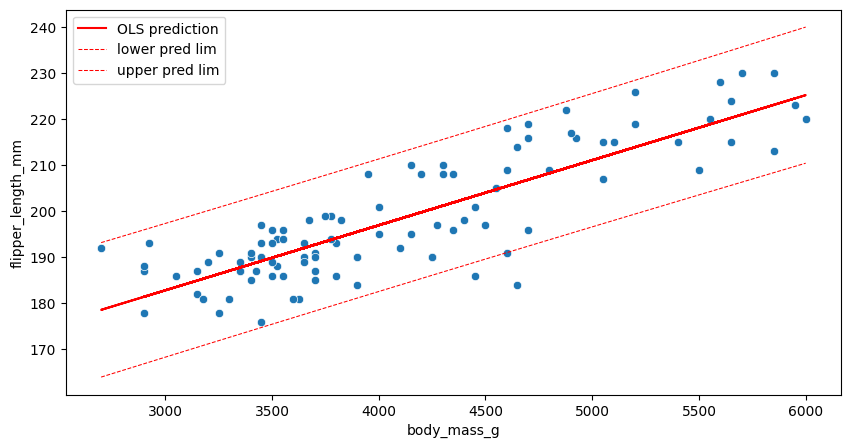

In [49]:
order = np.argsort(penguins['body_mass_g'])
xs = np.array(penguins['body_mass_g'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

order = np.argsort(penguins['body_mass_g'])
x = np.array(penguins['body_mass_g'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

<h3>Prediktionsintervall out of sample-prediktion</h3>

      body_mass_g
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


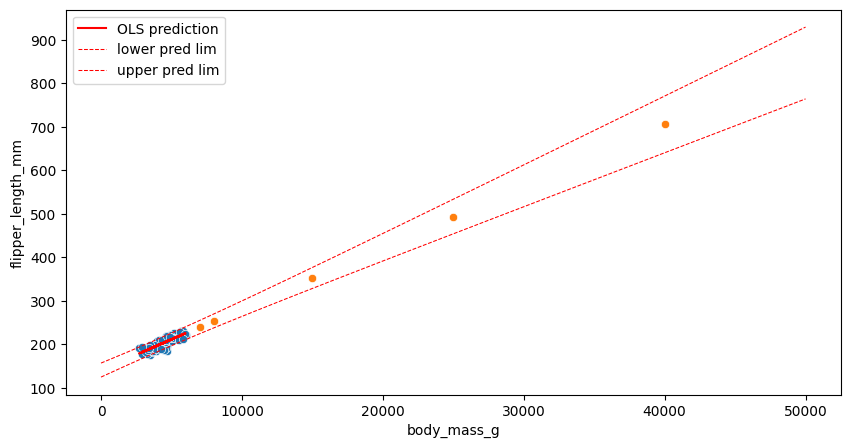

In [55]:
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['body_mass_g'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm')
ax.plot(penguins['body_mass_g'], ypred, "r", label="OLS prediction")

predictions_oos = pd.DataFrame([7000, 8000, 15000, 25000, 40000], columns=['body_mass_g'])
ypred_oos = model.predict(predictions_oos)
predictions_oos['pred'] = ypred_oos
sns.scatterplot(data=predictions_oos, x='body_mass_g', y='pred')

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

ax.legend(loc="best")
plt.show()